# Empalme con la clase anterior

**Teorema 1.3.2** (Ostrowski). Asuma que la matriz $A$ del sistema
$A \mathbf{x} = \mathbf{b}$ es positiva definida y $0 < \omega < 2$. Entonces la iteraci'on con matriz $T_\omega$

$$ T_\omega =  (D + \omega L)^{-1} [ (1 - \omega) D - \omega U)]  $$
converge.

$$x_i^{(k+1)} =  (1 - \omega) x_i^{(k)} + \frac{\omega}{a_{ii}}
\left (  b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right )  \tag{1.27} $$

**Teorema 1.3.3 (Young): Si $0 < \omega < 2$, $T_j$ tiene autovalores reales con $A$ invertible, $\beta=\rho(T_j) < 1$, el sistema de relaci'on basado en la iteracion de Gauss--Seidel 1.27 converge y

$$\rho(T_w) = \begin{cases}
1 - \omega + \frac12 \omega^2 \beta^2 + \omega \beta \sqrt{1 - \omega + \frac{\omega^2 \beta^2}{4}} \quad , \quad 0 < \omega < \omega_{opt} \\
\omega -1 \quad , \quad \omega_{opt} < \omega < 2
\end{cases} $$
donde
$$\omega_{opt} = \frac{2}{1 + \sqrt{1 - \beta^2}}. $$

La Figura

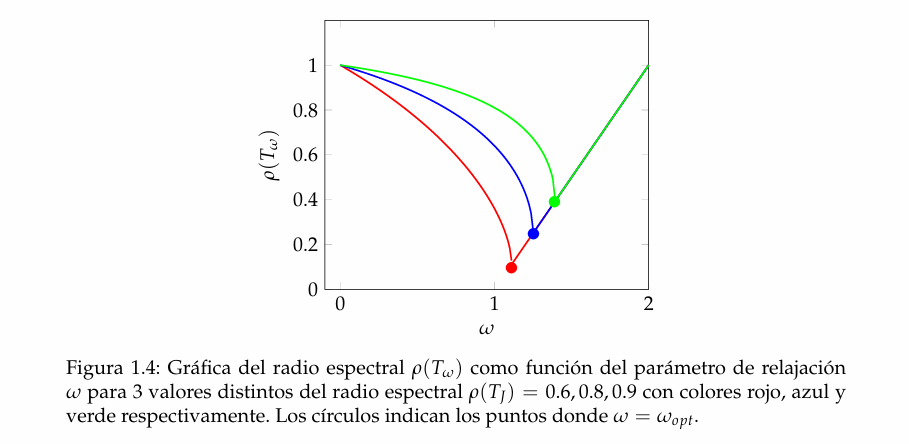

La [Tesis de Young](https://web.ma.utexas.edu/CNA/DMY/david_young_thesis.pdf) esta en es link.

## Implementaci'on del metodo de over-relaxation.
**Ejemplo 1.3.1**: Encuentre la solucion aproximada del sistema

$$\begin{pmatrix}
5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & -6
\end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} -1 \\ 4 \\ 0\end{pmatrix} $$

In [13]:
import numpy as np
from numpy import linalg as LA

def sor(A, b, w, nmax, tol):
    n = len(b)
    x = np.zeros(n)
    xnew = np.zeros(n)

    k=0

    error=10
    while( k < nmax and tol < error):
        for i in range(n):
            S = 0

            # save x en xnew
            xnew[i] = x[i]
            for j in range(n):
                if i != j:
                    S = S + A[i,j]*x[j]
            x[i] = (1 - w)*x[i] + omega*(b[i]- S)/A[i][i]  # eq 1.27.
        k += 1

        S=0
        for j in range(n):
            S += (xnew[j] - x[j])**2  # cuadrado del error error

        error = S**(0.5)

        print(" solucion x para la iteracion k=%d con error %5.4f"%(k, error))
        print("  ", x)
        print("k=",k)
        print("nmax=",nmax)
        print("tol=",tol)
        print("error=",error)
    return



In [14]:
# prueba
A  = np.array([[5,-2,3],[-3,8, 1],[-3,-1,-6]])

# vector b
b = np.array([-1,4,0])

nmax=100
tol=0.001
omega = 1.2
sor(A, b, omega, nmax, tol)




 solucion x para la iteracion k=1 con error 0.5493
   [-0.24    0.492   0.0456]
k= 1
nmax= 100
tol= 0.001
error= 0.5493117147849661
 solucion x para la iteracion k=2 con error 0.2988
   [ 0.011328    0.4998576  -0.11588832]
k= 2
nmax= 100
tol= 0.001
error= 0.2988410663850977
 solucion x para la iteracion k=3 con error 0.0906
   [ 0.08110564  0.55390927 -0.13626757]
k= 3
nmax= 100
tol= 0.001
error= 0.0905859550714935
 solucion x para la iteracion k=4 con error 0.0299
   [ 0.10776797  0.55815387 -0.14903804]
k= 4
nmax= 100
tol= 0.001
error= 0.029866060892878764
 solucion x para la iteracion k=5 con error 0.0072
   [ 0.11366765  0.56187538 -0.15076806]
k= 5
nmax= 100
tol= 0.001
error= 0.007186711406812437
 solucion x para la iteracion k=6 con error 0.0021
   [ 0.11551965  0.56222398 -0.15160298]
k= 6
nmax= 100
tol= 0.001
error= 0.0020611905240240755
 solucion x para la iteracion k=7 con error 0.0005
   [ 0.11591772  0.56245863 -0.15172176]
k= 7
nmax= 100
tol= 0.001
error= 0.00047710401311

Nota:
* Jacobi 17 iteraciones
* Gauss--seidel 12
* SOR: 7

## Metodo iterativo de Jacobi con pesos
La ecuaci'on basica es

$$\mathbf{y}  = (1 - \omega) \mathbf{x}_k + \omega T_j(\mathbf{x}_k) $$


$$\mathbf{y} = (1 - \omega) \mathbf{x}_k - \omega D^{-1}(L+U) \mathbf{x}_k + \omega D^{-1} \mathbf{b} . $$

Si \mathbf{y} = \mathrb{x}_{k+1}$ entonces

$$\mathbf{x}_{k+1} = (1 - \omega) \mathbf{x}_k - \omega D^{-1}(L+U) \mathbf{x}_k + \omega D^{-1} \mathbf{b} . $$

Usualmente se usa $\omega= 2/3$.
[Gilbert Strang](https://ocw.mit.edu/courses/18-086-mathematical-methods-for-engineers-ii-spring-2006/pages/readings/) ofrece una explicacion para el valor $\omega=2/3$. Este valor provee un suavizado de las altas frecuencias y autovalores mas pequenhos.
Sin embargo, en este curso no ofrecemos mas detalles de esto.

# Capitulo 2
## Solucion numerica de ecuaciones diferenciales parciales mediante el metodo de diferencias finitas.

###  Introduccion.
De todo lo que dije
* Mas del 99.99999999 por ciento de problemas PDE (Partial Differential Equations) no tiene solucion analitica. La unica esperanza es esta, la numerica.
* Los metodos analiticos son ultiles para:
    * Para entender los problemas y poder interpretar las soluciones.
    * Para comparar con los numericos y tener un grado de confianza en la implementacion numerica de los algoritmos.


Existen algunos metodos numericos para resolver ecuaciones diferenciales.
* Diferencias finitas (este curso)
* Elementos finitos (curso futuro) Ver Capitulo 3.
* M'etodo de lineas
* Volumenes finitos.

En este curso solo estudiamos **diferencias finitas**.

### Taxonomia de ecuaciones diferenciales parciales.
Veamos la notacion.
Asuamos por el momento que la solucion es una superficie $z=u(x,y)$.

La notaci'on para derivadas parciales (de segundo orden) es

$$\frac{\partial^2 u}{\partial x \partial y} = u_{xy} = u_{,12} $$
Esos simbolos significan lo mismo. Segundas derivadas parciales mixtas.

Asumimos en este curso $u_{xy} = u_{yx}$.

Podemos generalizar $u=u(x_1, x_2, \cdots, x_n)$. Escribimos la siguiente notacion

$$\frac{\partial^{i_1 + i_2 + \cdots + i_n}u}{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} = u_{x_1^{i_1} x_2^{i_2} \cdots x_n^{i_n}}
= u_{, 1^{i_1} 2^{i_2} \cdots n^{i_n}} \quad  i_j=0,1,2 \cdots,  \quad , \quad j=1,2, \cdots, n $$





Un ejemplo. Asuamamos $u=u(x_1, x_2, x_3)$ con $x_1=x, x_2=y, x_3=z$
entonces. $i_1=1, i_2=2, i_3=0$
Esto indica, derivadas parciales de orden $1$ en $x$, $2$ en $y$ y ninguna en $z$.


 $$\frac{\partial^{i_1 + i_2 + \cdots + i_n}u}{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} = \frac{\partial u^3}{\partial x_1 \partial x_2^2} = u_{x_1 x_2^2} = u_{x y^2} = u_{xyy} = u_{,12^2} = u_{,122}$$


**Definicion de ecuacion diferencial con derivadas parciales**: La definicion se puede hacer como una function $f$ de las siguientes variables.
$u=u(x_1, x_2, \cdots, x_n)$

$f \left (x_1, x_2, \cdots, x_n, u, \frac{\partial^{i_1 + i_2 + \cdots + i_n}u}{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} \right ) = 0. \quad , \quad i_j=0,1,2 \cdots,  \quad , \quad j = 1,2, \cdots, n$

**Definicion de lineal**: La ecuacion es lineal si $f$ es lineal en $u$ y en las derivadas parciales.  El **orden** de la ecuacion es el maximo de los ordenes de derivadas parciales. Es decir $\max  \{i_1 + i_2 + \cdots + i_n\}$
El orden debe ser $\ge 1$ para que haya ecuacion diferencial.

Enfoquemonos poco a poco mas en el curso. Vamos a estar intersados solo en ecuaciones de orden 2.

Por ejemplo las ecuaciones **lineales** de orden 2 se pueden escribir como

$$\sum_{i,j=1}^n A_{ij} u_{,ij} + \sum_{i=1}^n B_i u_{,i} + g(x_1, x_2, \cdots, x_n) = 0 . $$
donde $A_{ij}, B_i$ son coeficientes que no dependen ni de $u$ ni de ninguna derivada parcial. Pero pueden depender de $x_1, x_2, \cdots, x_n$.

Sigamos siendo mas espec'ificos.

**Ejemplo 2.1.1**: Asuma que $u$ es una funcion de las variables $x,y,t$. Es decir $u=u(x,y,t)$. Consideramos la ecuacion

$$A u_{xx} + B u_{xy} + C u_{yy} + D u_{xt} + E u_{yt} + F u_{tt} + G u_x + H u_y + I u_t g(x,y,t)= 0 $$
donde $A, B, \cdots, I$ son funciones de $x,y,t$ solamente. Esta es la forma mas general de ecuaciones diferenciales lineales de segundo orden en las variables $x,y,t$. Para que sean de segundo orden,

Donde $A^2 + B^2 + \cdots + F^2 \ne 0$.

Usando notacion indizal $x:=1 , y:=2, t:=3$


$$A u_{,11} + B u_{,12} + C u_{,22} + D u_{,13} + E u_{,23} + F u_{,33} + G u_{,1} + H u_{,2} + I u_{,3}+ g(x,y,t)= 0 $$



Vamos a darle los nombres a los operadores como siguie

$$ X = \frac{\partial}{\partial x}  \quad, \quad Y= \frac{\partial}{\partial y} \quad , \quad T = \frac{\partial}{\partial t} \tag{2} $$

Las ecuaciones de segundo orden se vuelven supericies o curvas conicas.
Veamos por que  y ejemplos mas espeficicos.

1. **Elipticas**:
$$f(X,Y) = \frac{X^2}{a^2} + \frac{Y^2}{b^2} - 1 = 0. $$
Esto es una elipse. Podemos escrbir la ecuacion de forma

$$A(x,y) X^2 + B(x,y) Y^2 = g(x,y) $$

Por ejemplo si $A=B=1$ y $g(x,y) = \rho(x,y)$ encontramos

$$\nabla^2 u = \frac{\partial u^2}{\partial x^2}  + \frac{\partial u^2}{\partial y^2} = \rho(x,y)$$
y a esta ecuaci'on se le llama la **ecuacion de Poisson**.
Si $\rho(x,y)=0$ el numbre es **ecuacion de Laplace**.
$$\nabla^2 u = \frac{\partial u^2}{\partial x^2}  + \frac{\partial u^2}{\partial y^2} = 0 $$
Esta es la Ecuacion de Laplace.

1. **parabolicas**:
$$f(X,T) = T - \alpha X^2 - g(x,t) = 0. $$
Haciendo uso de las definiciones  (2) escribimos

$$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = g(x,t).$$
El fenomeno tipico para esta ecuacion es **calor**.

3. **Hiperbolicas**:
$$f(X, T) = \frac{X^2}{a^2} - \frac{T^2}{b^2} = 1 $$
podemos escribir mas generalmente

$$A(x,t) \frac{\partial u^2}{\partial x^2} - B(x,t) \frac{\partial^2 u}{\partial t^2} = g(x,t) $$
Generalmente al termino $g(x,t)$ se le denomina **fuente** (source).

Caso tipico
* $A=1$
* $B=\frac{1}{v^2}$, $v(x,y)$ representa la velocidad.
y obtenemos

$$ \frac{\partial^2 u}{\partial x^2} - \frac{1}{v^2(x,y)} \frac{\partial^2 u}{\partial t^2} = g(x,t) $$
Es la **ecuacion de onda** en una dimension.

En general podemos escribir las ecuaciones en dos variables (espaciales), con derivadas parciales como

$$A u_{xx} + B u_{xy} + C u_{yy} + D u_x + E u_y + F u + G = 0 $$
El nombre eliptica, parabolica, hiperbolica viene del **discriminante**.
Las conicas se escriben como

$$A x^2 + B xy + C y^2 + D x + E y + F  = 0. $$

El **discriminante** $\Delta = B^2 - 4 AC$
El nombre de la conica es:


* **elipitca**:  $\Delta < 0$.

* **parab'olica**:  $\Delta = 0$.
* **hiperbolica**:  $\Delta > 0$.

## Metodo de diferencias finitas.

En todo lo que sigue.
1. El **dominio** se define como un area rectangular.
$$R , a \le x \le b \quad , \quad   c \le y \le d $$
Este dominio tiene una frontera (bordes) que es muy importante, por que desde aca se propaga la solucion hacia el interior.

2. La **frontera** es

$$\{ (x,y) \mid  (x = a \lor x=b  , c \le y \le d \} \cup \{ (x,y) \mid y=c \lor y=d , a \le x \le b \}  $$

3. La **malla** (grid). Son todos los puntos $(x_i, y_i)$ tales que
    * $x_0=a \quad , \quad x_i = x_0 + i h \quad , \quad h =(b-a)/n$
    asumiendo que definimos $n+1$ puntos a lo largo de eje $x$.
    Tambien pude defnir el intervalor $\Delta x= h$ y si el maximo numero es $n$, $x_n=x_0 + n h$, $x_0 + n h = b$.

 * $y_0=c \quad , \quad y_j = y_0 + j k \quad , \quad k =(d-c)/m$
    asumiendo que definimos $m+1$ puntos a lo largo de eje $y$.
    Tambien pude defnir el intervalor $\Delta y= k$ y si el maximo numero es $m$, $y_m=y_0 + m k$, $y_0 + m k = d$.

4. Se denotan las soluciones $u(x_i, y_j)= u_{ij}$, $i=0,1,2, \cdots, n$,
$j=0,1, 2, \cdots m$. Los valores en la frontera $u_{nj}$, $j=0,1, \cdots, n$,
o $u_{im}$, $i=0,1,2, \cdots, n$. Se conocen.

5. Se usan las condiciones iniciales o de frontera para propagar la solucion.
Que son condiciones iniciales?  Generalmente pasa cuando una de las variables es tiempo $t$. Se fija un  valor inicial $t_0$ y no se especifica un valor final. Este se limita por la memoria del computador y el tiempo de interes, pero no se usa para propagar.

La Figura 2.1 ilustra un **nodo** $(x_i, y_i)$ de la **malla** tal como
lo describimos en esta celda.

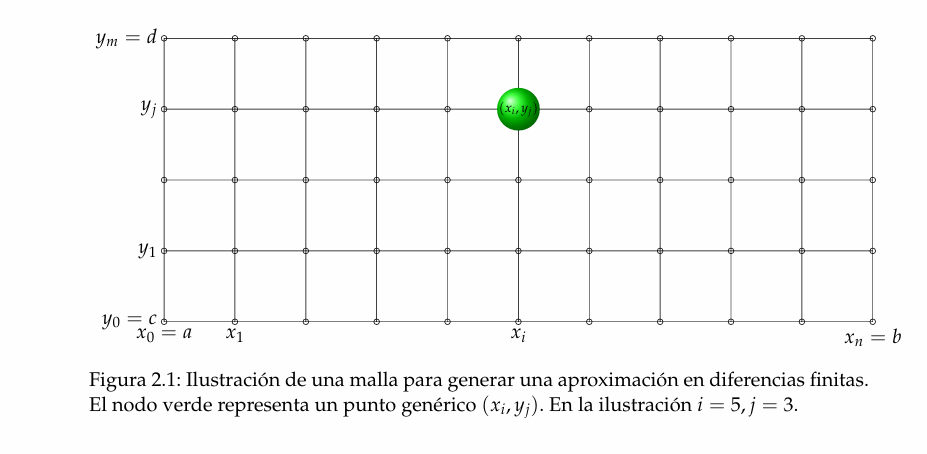

## Definiciones basicas de las derivadas parciales.

$$u_x (x,y) = \frac{u(x+h, y) - u(x,y)}{h} - u_{xx}(c,y) \frac{h}{2} $$
Esta expresion viene de la expansion de Taylor en primer orden con error. Aca $c \in [a,b]$.

En cada uno de los puntos de la malla tenemos

$$u_x (x_i,y_j) = \frac{u(x_i+h, y_j) - u(x_i,y_j)}{h} - u_{xx}(c,y_j) \frac{h}{2} $$
$c$ es un punto en $[x_{i}, x_i + h]$
Ojo con la siguiente notacion. A los puntos $u(x_i, y_j)$ sobre la malla los llamaremos, por simplificacion $w_{ij}$.

Con esta notacion escribimos

$$u_x(x_i,y_j)  \approx \frac{w_{i+1 j} - w_{ij}}{h} $$

Existe la derivda hacia atras.

$$u_x(x_i,y_j)  \approx \frac{w_{i j} - w_{i-1 \;  j}}{h} $$

La central
$$u_x(x_i,y_j)  \approx \frac{w_{i+1 j} - w_{i-1 \;  j}}{2 h} $$
es mas precisa. El orden de error es $\mathcal{O}(h^2)$

## Segundas derivadas.

$$u_{xx}(x_i, y_j) \approx \frac{w_{i+1 \; j} - 2 w_{ij} + w_{i-1 \; j}}{h^2} $$

$$u_{yy}(x_i, y_j) \approx \frac{w_{i \; j+1} - 2 w_{ij} + w_{i \; j-1}}{k^2} $$
El error en cada una es $\mathcal{O}(h^2)$, $\mathcal{O}(k^2)$

El programa es:
* Parabolicas (calor)
* Elipticas (Laplace, Poisson)
* Hiperbolicas (onda)

# Proxima Clase:
## Parabolicas.